# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website<br>
group - Whether the user belongs to the first group (control) or the second group (treatment)<br>
landing_page - Whether the landing page is new or old<br>
time_spent_on_the_page - Time (in minutes) spent by the user on the landing page<br>
converted - Whether the user gets converted to a subscriber of the news portal or not<br>
language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Python Course/abtest.csv')
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [11]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [12]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


* *The dataset contains which group the user belongs to, whether the landing page is old or new, time spent (in minutes) on the page, whether the user gets converted to a subscriber of the news portal or not and the preferred language by the user to view the landing page.*

In [5]:
df.shape

(100, 6)

* *There are 100 rows and 6 columns in our data frame.*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* *The user_id and time_spent_on_the_page columns are numerical. While group, landing_page, converted, and language_preferred are categorical.*
* *There are no duplicates in our dataset.*

In [8]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* *There are no missing values in our dataset.*

In [7]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* *The average time users spent on the page is 5.38 minutes.*
* *The median time was 5.41 minutes spent on the page.*

### Univariate Analysis

In [32]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

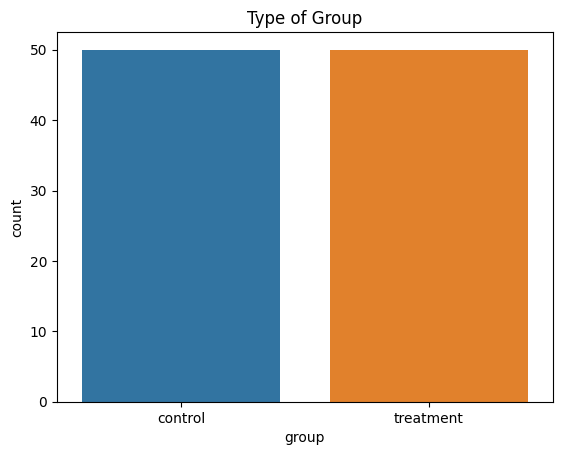

In [113]:
sns.countplot(data=df,x='group')
plt.title('Type of Group')
plt.show()

* *The are 50 users in the control group and 50 users in the treatment group*

In [33]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

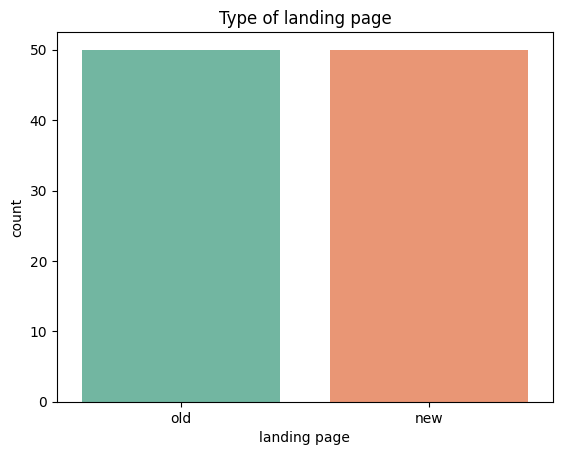

In [114]:
sns.countplot(data=df, x='landing_page', palette='Set2')
plt.title('Type of landing page')
plt.xlabel('landing page')
plt.show()

* *There are 50 users assigned to the old landing page (control group) and 50 users on the new landing page (treatment group).*

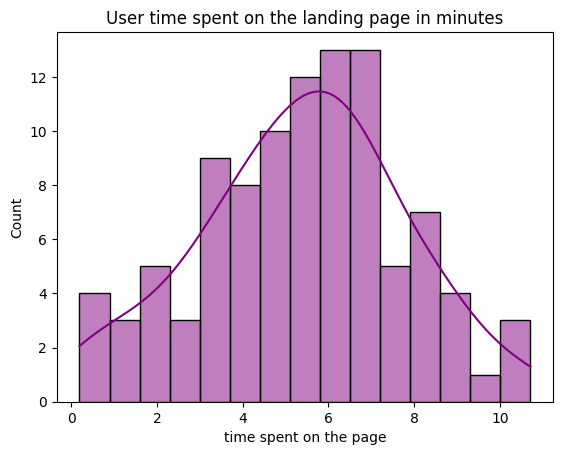

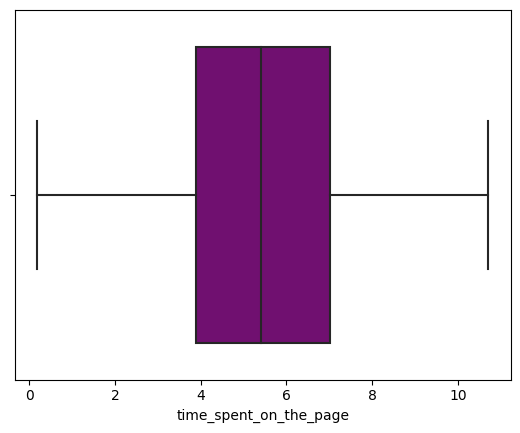

In [115]:
sns.histplot(data=df, x='time_spent_on_the_page', color='purple', bins=15, kde=True)
plt.xlabel('time spent on the page')
plt.title('User time spent on the landing page in minutes')
plt.show()
sns.boxplot(data=df, x='time_spent_on_the_page', color='purple')
plt.show()

* *The average time spent on the landing page for users is between 5 and 6 minutes.*
* *The time spent on the landing page follows a normal distribution.*

In [35]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

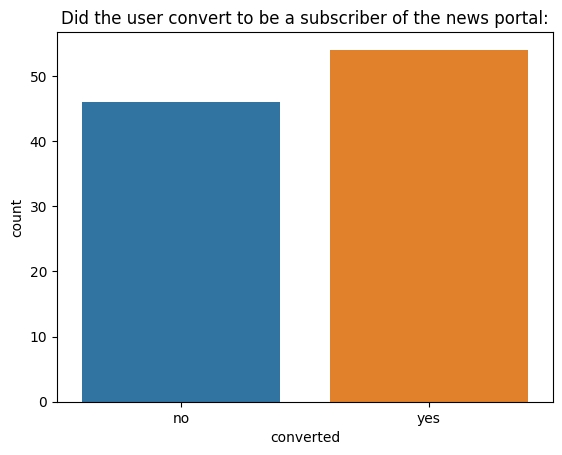

In [116]:
sns.countplot(data=df, x='converted')
plt.title('Did the user convert to be a subscriber of the news portal:')
plt.show()

* *54 users converted to be a subscriber of the news portal and 46 did not subscribe.*
* *There are more users that converted to a subscriber of the news portal than not.*

In [37]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

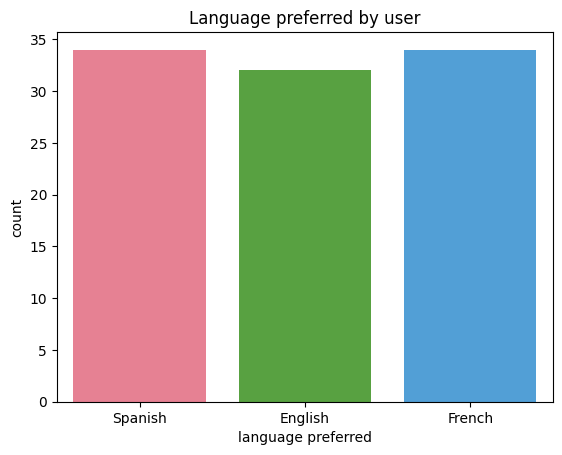

In [117]:
sns.countplot(data=df, x='language_preferred', palette='husl')
plt.title('Language preferred by user')
plt.xlabel('language preferred')
plt.show()

* *Users can choose between Spanish, English, or French for their preferred language on the landing page.*
* *There are 34 users who prefer Spanish, 34 who prefer French and 32 who prefer English.*

### Bivariate Analysis

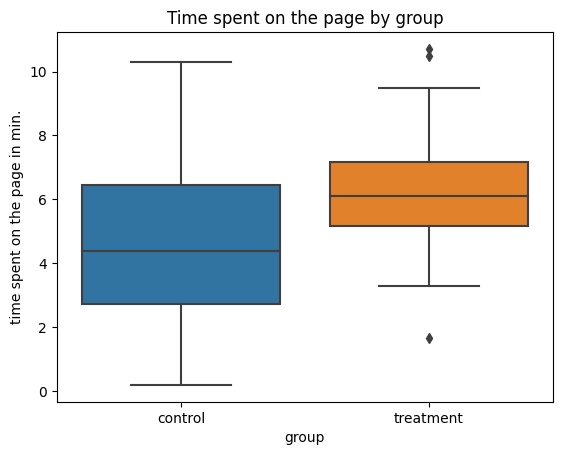

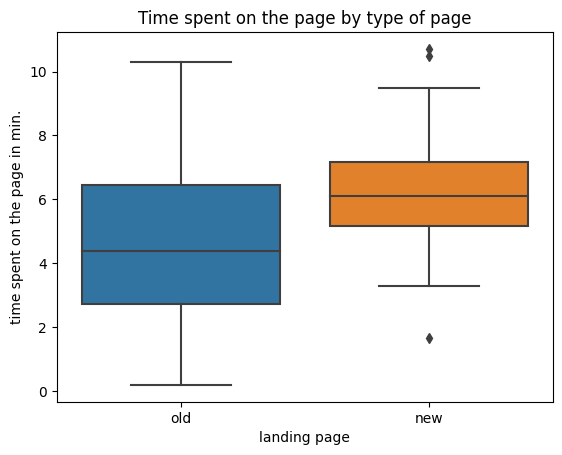

In [120]:
sns.boxplot(data=df, x='group', y='time_spent_on_the_page')
plt.title('Time spent on the page by group')
plt.ylabel('time spent on the page in min.')
plt.show()

sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title('Time spent on the page by type of page')
plt.xlabel('landing page')
plt.ylabel('time spent on the page in min.')
plt.show()

* *Based on the data observed, the control group that is on the old landing page spends on average less time looking at the landing page than the treatment group (new landing page).*

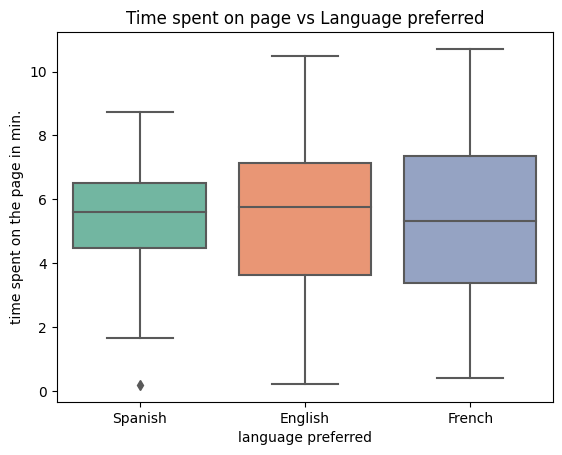

In [121]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', palette='Set2')
plt.title('Time spent on page vs Language preferred')
plt.xlabel('language preferred')
plt.ylabel('time spent on the page in min.')
plt.show()

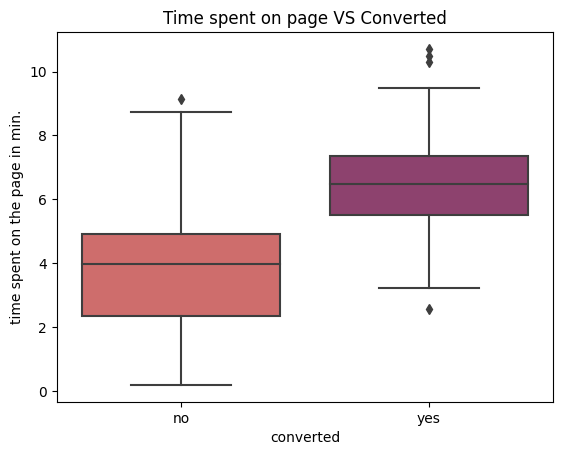

In [122]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', palette='flare')
plt.title('Time spent on page VS Converted')
plt.ylabel('time spent on the page in min.')
plt.show()

* *We can observe that those that converted to a news portal subscription on average spent more time on the landing page than those that did not subscribe.*

## 1. Do the users spend more time on the new landing page than the existing landing page?

### **Visual Analysis**

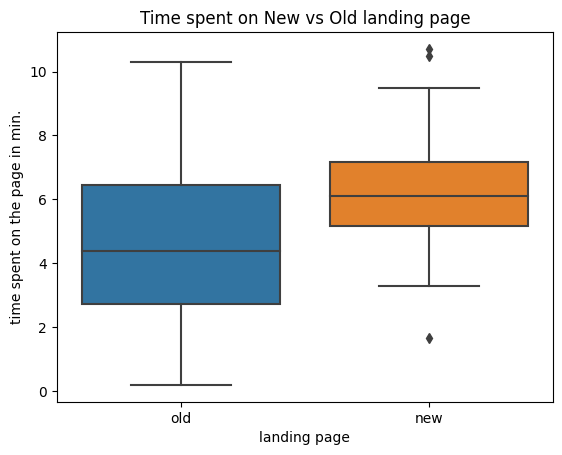

In [123]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title('Time spent on New vs Old landing page')
plt.ylabel('time spent on the page in min.')
plt.xlabel('landing page')
plt.show()

### **Define the null and alternate hypotheses**

Let $\mu_1$ be the average time users spend on the new landing page and $\mu_2$ be the average time users spend on the old landing page.

Null Hypothesis:
* $H_0:$ Users spend an equal amount of time on the new landing page vs the old landing page.

Alternate Hypothesis:
* $H_A:$ Users spend more time on the new landing page than the old landing page.

Mathematically, the above formulated hypotheses can be written as:
* $H_0:\mu_1=\mu_2$
* $H_A:\mu_1>\mu_2$


### Step 2: Select Appropriate test

This is a test concerning two population means from two independent populations. The population standard deviations are unknown in this one-tailed test. Based on this information we will select a **2 sample independent t-test** to test our hypotheses.

### Step 3: Decide the significance level

As given in the problem statement $\alpha = 0.05$

### Step 4: Collect and prepare data

In [61]:
new_time_spent= df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_time_spent = df[df['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [67]:
from scipy.stats import ttest_ind

In [103]:
test_stat, p_value_1= ttest_ind(new_time_spent, old_time_spent, alternative='greater')
print('The p-value is', p_value_1)

The p-value is 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [105]:
if p_value_1 < 0.05:
    print(f'As the p-value {p_value_1:.4f} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_1:.4f} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

* *As the p-value is < $\alpha$ (0.05) we reject the null hypothesis. We have enough statistical evidence to conclude that users spend more time on the new landing page than the old landing page.*


**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### **Visual Analysis**

In [72]:
pd.crosstab(df.converted,df.landing_page,margins=True)

landing_page,new,old,All
converted,,,
no,17,29,46
yes,33,21,54
All,50,50,100


* *There are 33 users who subscribed using the new landing page and 21 users who subscribed using the old landing page.*

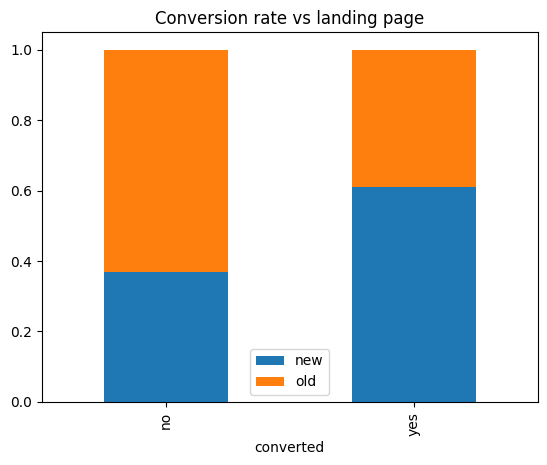

In [77]:
pd.crosstab(df['converted'],df['landing_page'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.title('Conversion rate vs landing page')
plt.show()

### **Define the null and alternate hypotheses**
Let $p_1$ be the proportion of users converted who visit the new landing page and $p_2$ be the proportion of users converted who visit the old landing page.

Null Hypothesis:
* $H_0:$ The proportion of users who visit the landing page and get converted are equal for the new page vs the old page.

Alternate Hypothesis:
* $H_A:$ The proportion of users who visit the landing page and get converted are greater for the new page than the old page.

Mathematically, the above formulated hypotheses can be written as:
* $H_0:p_1=p_2$
* $H_A:p_1>p_2$


### **Select appropriate test**
This is a one-tailed test concerning two sample proportions from two indpendent populations. We will use the **2 sample z-test for proportions** to test our hypotheses.

### **Level of significance**
As given in the problem statement $\alpha = 0.05$

### **Calculate the p-vale and compare with $\alpha$**

In [106]:
from statsmodels.stats.proportion import proportions_ztest

converted_count = np.array([33, 21])
nobs = np.array([50, 50])
test_stat, p_value_2 = proportions_ztest(converted_count, nobs)
print('The p-value is ' + str(p_value_2))

The p-value is 0.016052616408112556


In [107]:
if p_value_2 < 0.05:
    print(f'As the p-value {p_value_2:.4f} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_2:.4f} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0161 is less than the level of significance, we reject the null hypothesis.


### **Draw Inference**
* As the p-value < $\alpha$ (0.05) we have enough statistical evidence to reject the null hypothesis. The proportion of users who visit the landing page and get converted are greater for the new page than the old page.


## 3. Is the conversion and preferred language independent or related?

### **Visual Analysis**

In [81]:
pd.crosstab(df.converted,df.language_preferred,margins=True)

language_preferred,English,French,Spanish,All
converted,,,,
no,11,19,16,46
yes,21,15,18,54
All,32,34,34,100


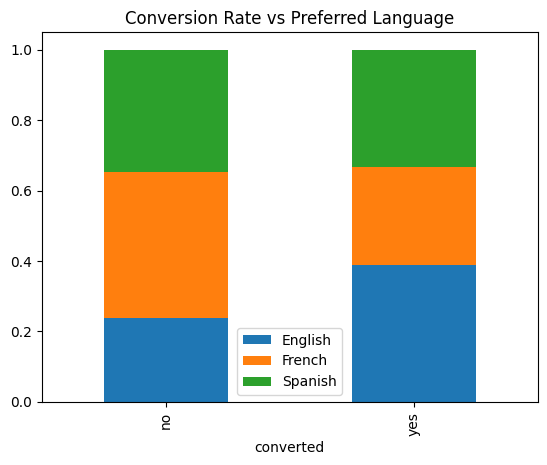

In [84]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar",stacked=True)
plt.legend()
plt.title('Conversion Rate vs Preferred Language')
plt.show()

### **Define null and alternate hypotheses**
We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.

### **Select appropriate test**

As we are testing to determine if conversion is related to the preferred language by users, will use the **Chi-Square Test of Independence** to test our hypotheses.

### **Level of significance**
As given in the problem statement $\alpha = 0.05$

### **Collect and prepare data**

In [85]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### **Calculate the p-value and compare with $\alpha$**

In [108]:
from scipy.stats import chi2_contingency
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency_table)
print('The p-value is', p_value_3)

The p-value is 0.21298887487543447


In [109]:
if p_value_3 < 0.05:
    print(f'As the p-value {p_value_3:.4f} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_3:.4f} is greater than the level of significance, we fail to reject the null hypothesis.')


As the p-value 0.2130 is greater than the level of significance, we fail to reject the null hypothesis.


### **Draw inference**
* As the p-value > $\alpha$ (0.05) we fail to reject the null hypothesis. We conclude that conversion is independent of preferred language.

## 4. Is the time spent on the new page same for the different language users?

### **Visual Analysis**

In [89]:
new_page_df = df[df['landing_page']=='new']

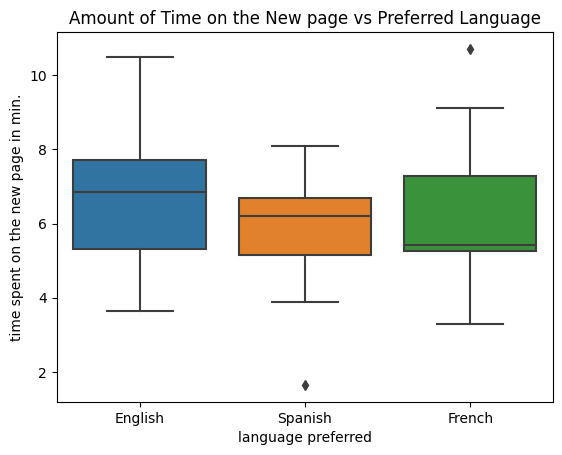

In [125]:
sns.boxplot(data=new_page_df, x='language_preferred', y='time_spent_on_the_page')
plt.title('Amount of Time on the New page vs Preferred Language')
plt.ylabel('time spent on the new page in min.')
plt.xlabel('language preferred')
plt.show()

In [94]:
new_page_df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

* *Based on the our observations so far, we cannot yet determine if time spent on the new page is the same for all the languages as their means are very close in number.*

### **Define null and alternate hypotheses**

Null Hypothesis:
* $H_0:$ The time spent on the new page is equal for the different language users.

Alternate Hypothesis:
* $H_A:$ The time spent on the new page is not equal for the different language users.

Mathematically, the above formulated hypotheses can be written as:
* $H_0:\mu_1=\mu_2=\mu_3$
* $H_A:$ the means are not all equal




### **Select Appropriate test**

We are determining if three sample means are equal or different. We will use the **One-Way ANOVA test** to test our hypotheses.

### **Level of significance**
As given in the problem statement $\alpha = 0.05$

### **Collect and prepare data**

In [97]:
time_spanish= new_page_df[new_page_df['language_preferred']=="Spanish"]['time_spent_on_the_page']
time_english= new_page_df[new_page_df['language_preferred']=="English"]['time_spent_on_the_page']
time_french= new_page_df[new_page_df['language_preferred']=="French"]['time_spent_on_the_page']

### **Calculate the p-value and compare with $\alpha$**

In [99]:
from scipy.stats import f_oneway

In [111]:
test_stat, p_value_4 = f_oneway(time_spanish, time_english, time_french)
print('The p-value is', p_value_4)

The p-value is 0.43204138694325955


In [112]:
if p_value_4 < 0.05:
    print(f'As the p-value {p_value_4:.4f} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value_4:.4f} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.4320 is greater than the level of significance, we fail to reject the null hypothesis.


### **Draw inference**
* As the p-value 0.4320 > $\alpha$(0.05) we fail to reject the null hypothesis. We can conclude that the time spent on the new page is equal for the different language users.

## Conclusion and Business Recommendations

###Conclusions:
* *We have enough statistical evidence to conclude that users spend more time on average on the new landing page than the old landing page.*
* *The proportion of users who visit the new landing page and get converted are greater than the conversion for the old page.*
* *We conclude that conversion is independent of preferred language.*
* *We can conclude that the time spent on the new page is equal for the different language users.*
* Based on conclusions from the statistical tests, the new landing page is more effective in gathering new subscribers.

###Recommendations:
* I recommend that we use the new landing page to attract new subscribers to the online news portal and continue to offer the landing page in the users preferred language.



___